Inspired by work of Marcin Rutecki - https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#3.5-99,8%25-Accuracy-score-before-implementing-any-model

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
from IPython.display import display
pd.set_option('display.max_columns', None)

In [142]:
raw_df = pd.read_csv('dataset/fraudTrain.csv')

In [143]:
raw_df.head()

,Id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [144]:
labels=["Genuine","Fraud"]

fraud_or_not = raw_df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

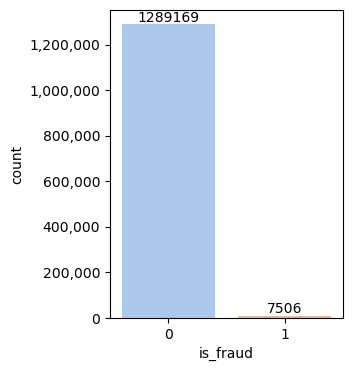

In [145]:
plt.figure(figsize=(3,4))

ax = sns.countplot(x='is_fraud', data=raw_df, palette="pastel")

# Format Y-axis tick labels to show full numbers with commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add bar labels
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.show()

In [146]:
print("Shape of data", raw_df.shape)
raw_df.info()

Shape of data (1296675, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  flo

In [147]:
raw_df.isnull().sum()

Id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [148]:
print('Genuine:', round(raw_df['is_fraud'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['is_fraud'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


In [149]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [150]:
df.drop(columns=["Id", "trans_num", "street"], inplace= True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,1371816816,42.788940,-103.241160,0


In [151]:

#Handling date fields
df['transaction_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_day']=df['transaction_time'].dt.day
df['trans_month']=df['transaction_time'].dt.month
df['trans_year']=df['transaction_time'].dt.year
df['trans_hour']=df['transaction_time'].dt.hour
df['trans_minute']=df['transaction_time'].dt.minute
df['weekday'] = df['transaction_time'].dt.weekday
df.drop(columns=['trans_date_trans_time','transaction_time'],inplace=True)
####
df['dob_extract']=pd.to_datetime(df['dob'])
df['dob_day']=df['dob_extract'].dt.day
df['dob_month']=df['dob_extract'].dt.month
df['dob_year']=df['dob_extract'].dt.year
df.drop(columns=['dob','dob_extract'],inplace=True)

In [152]:
columns_to_drop = ['first','last','unix_time','cc_num']
numerical_columns = ['amt','zip','lat','long', 'city_pop','merch_lat', 'merch_long',  'trans_day', 'trans_month',
       'trans_year', 'trans_hour', 'trans_minute', 'dob_day', 'dob_month','dob_year','weekday']
categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job']   
target_column = ['is_fraud']

In [153]:
df.drop(columns=columns_to_drop,inplace=True)

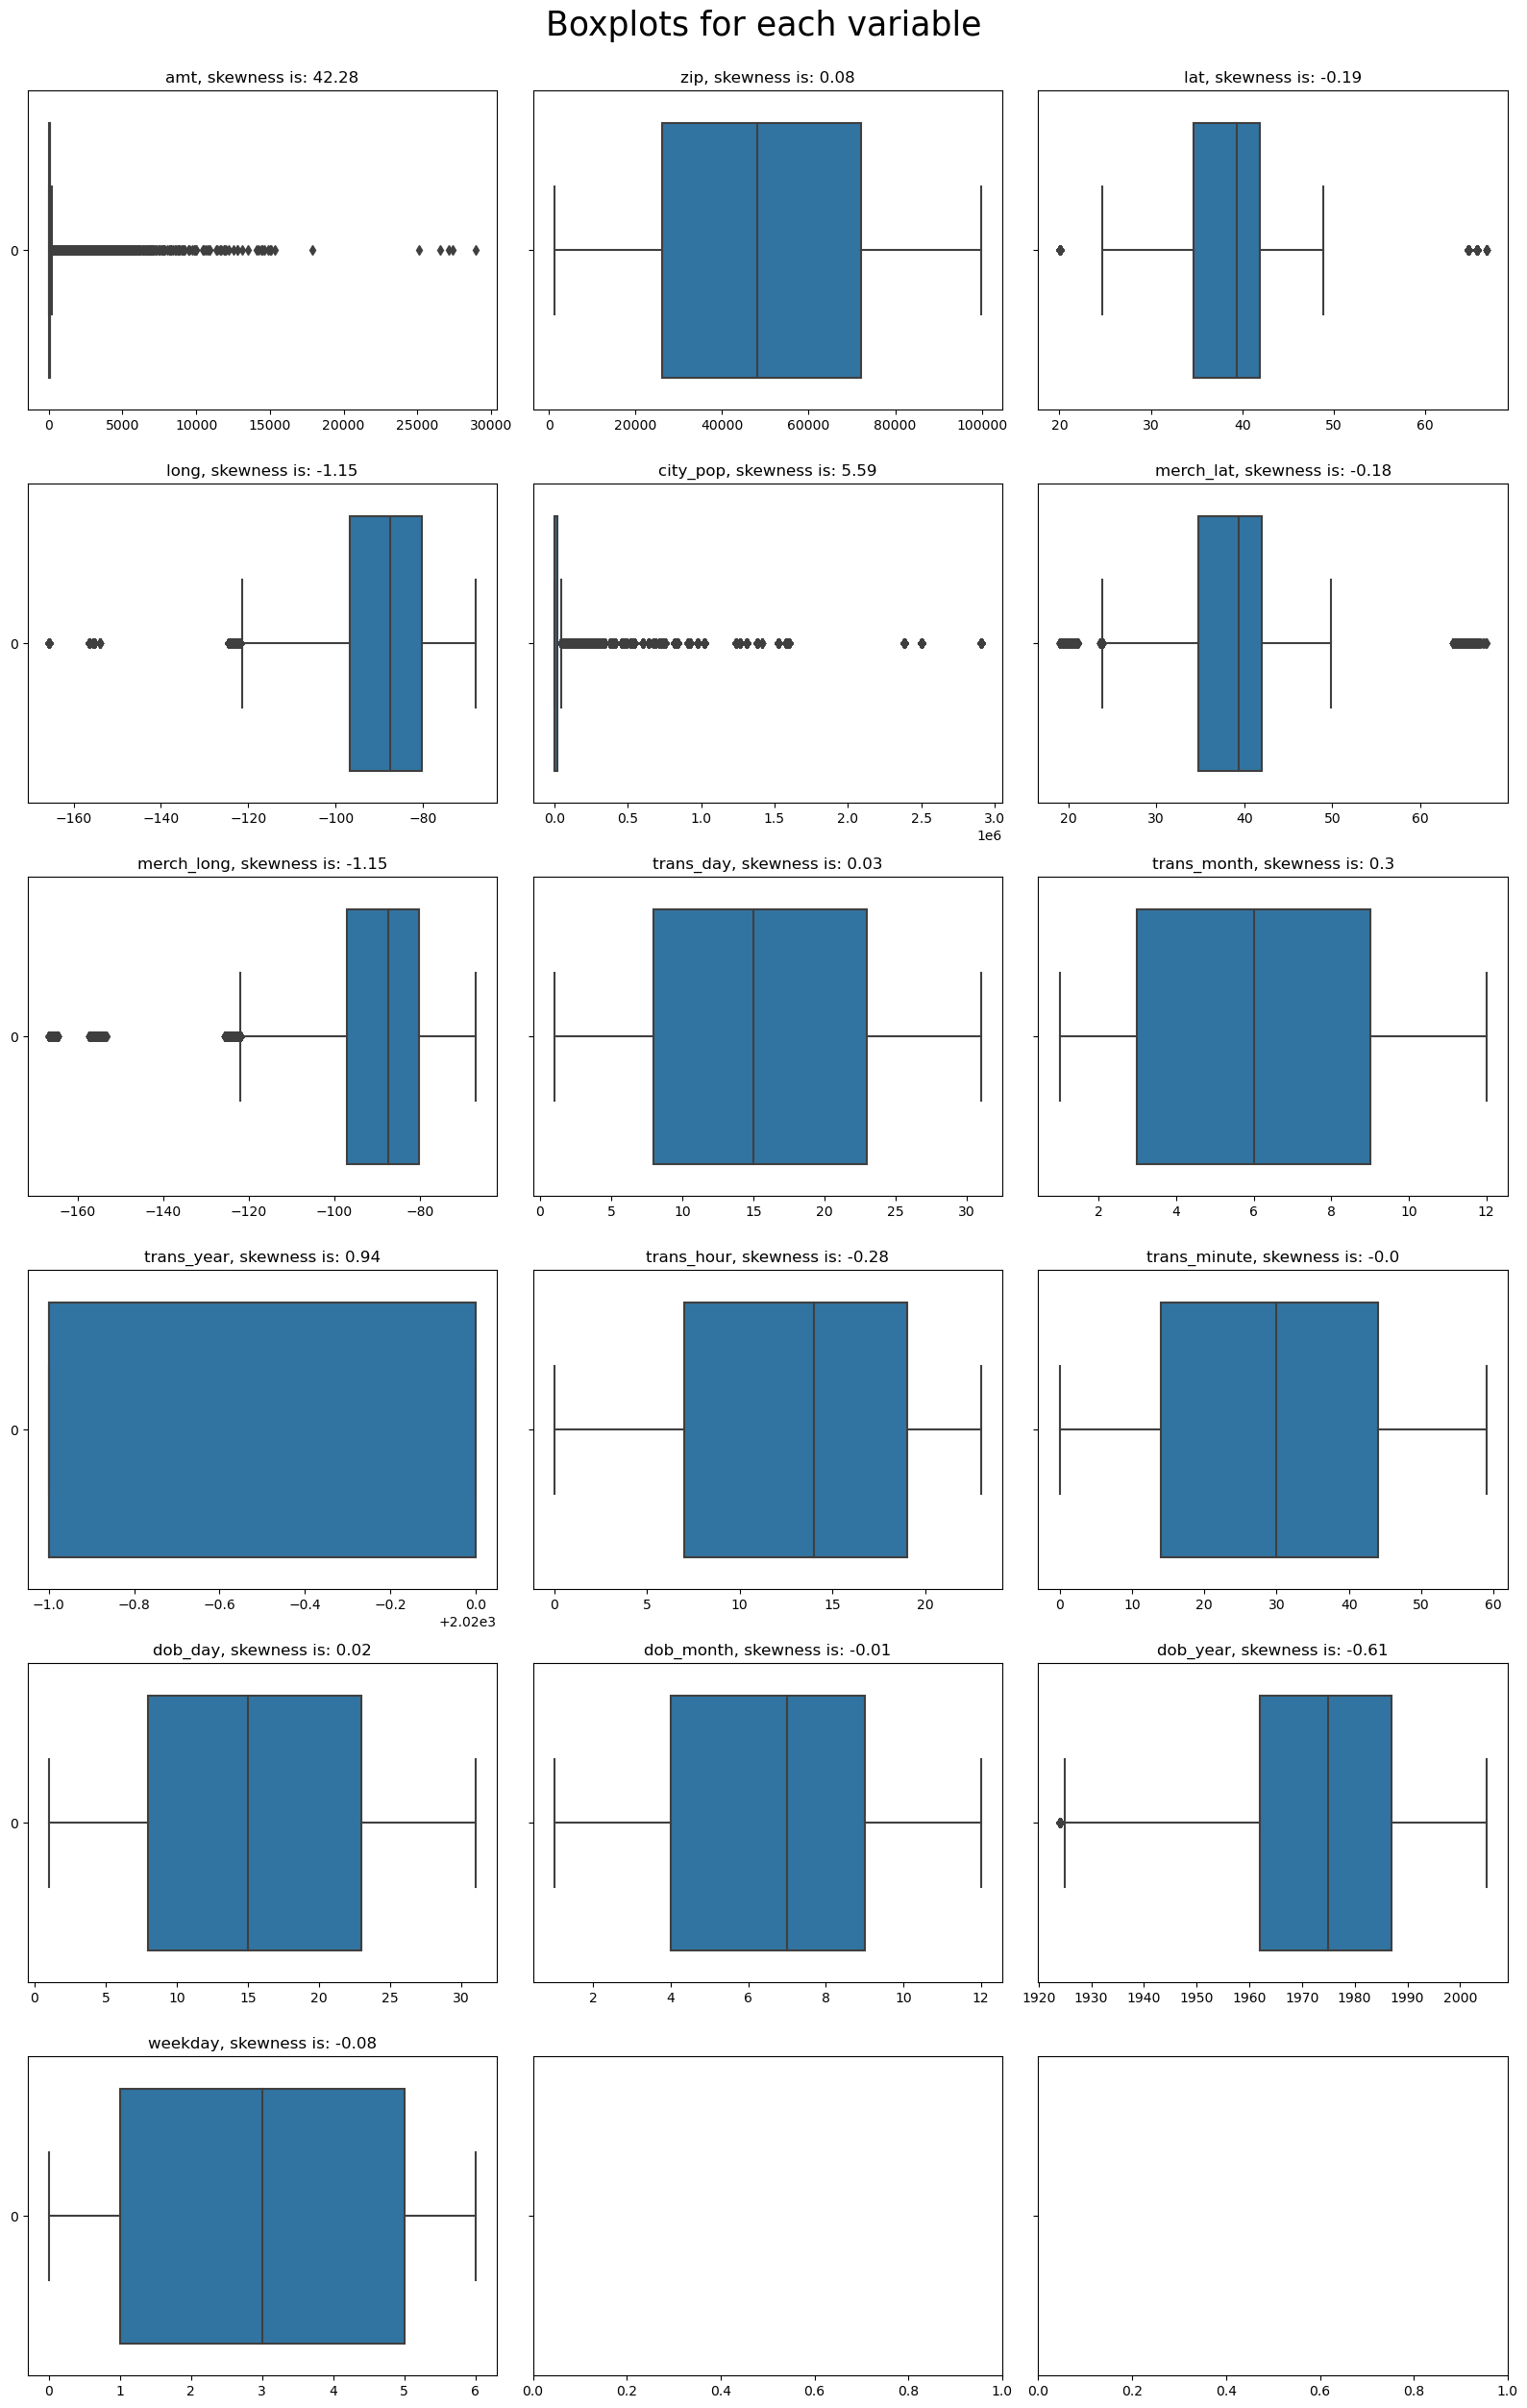

In [154]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=6, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

In [156]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [158]:
#Encoding data
merchant_freq = X_train['merchant'].value_counts() / len(X_train)
category_freq = X_train['category'].value_counts() / len(X_train)
city_freq = X_train['city'].value_counts() / len(X_train)
state_freq = X_train['state'].value_counts() / len(X_train)
job_freq = X_train['job'].value_counts() / len(X_train)

#Train data
X_train['merchant_encoded'] = X_train['merchant'].map(merchant_freq)
X_train['category_encoded'] = X_train['category'].map(category_freq)
X_train['city_encoded'] = X_train['city'].map(city_freq)
X_train['state_encoded'] = X_train['state'].map(state_freq)
X_train['job_encoded'] = X_train['job'].map(job_freq)

#Test data
X_test['merchant_encoded'] = X_test['merchant'].map(merchant_freq).fillna(0)
X_test['category_encoded'] = X_test['category'].map(category_freq).fillna(0)
X_test['city_encoded'] = X_test['city'].map(city_freq).fillna(0)
X_test['state_encoded'] = X_test['state'].map(state_freq).fillna(0)
X_test['job_encoded'] = X_test['job'].map(job_freq).fillna(0)

In [159]:
X_train.drop(['gender','merchant', 'category','city', 'state','job'], axis=1, inplace=True)
X_test.drop(['gender','merchant', 'category','city', 'state','job'], axis=1, inplace=True)

X_train.columns = X_train.columns.str.replace("_encoded", "")
X_test.columns = X_train.columns.str.replace("_encoded", "")

In [160]:
print(X_train.columns)
X_train.head()

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'trans_day', 'trans_month', 'trans_year', 'trans_hour', 'trans_minute',
       'weekday', 'dob_day', 'dob_month', 'dob_year', 'gender', 'merchant',
       'category', 'city', 'state', 'job'],
      dtype='object')


,amt,zip,lat,long,city_pop,merch_lat,merch_long,trans_day,trans_month,trans_year,trans_hour,trans_minute,weekday,dob_day,dob_month,dob_year,gender,merchant,category,city,state,job
192318,199.87,72011,34.5091,-92.4828,4074,34.963419,-92.300838,8,4,2019,23,46,0,20,12,1975,0,0.001411,0.075271,0.002427,0.024077,0.005512
318906,13.65,76678,31.6591,-96.8094,263,31.969251,-97.225975,2,6,2019,12,25,6,30,5,1956,0,0.001729,0.087079,0.001540,0.073122,0.004673
212432,47.98,1612,42.3066,-71.9202,4845,42.419528,-71.966339,18,4,2019,17,44,3,14,9,1926,0,0.001384,0.070036,0.000404,0.009500,0.003607
979043,157.10,33967,26.4722,-81.8122,224256,27.091677,-81.537608,1,2,2020,23,1,5,29,8,1985,0,0.001878,0.094954,0.001959,0.032875,0.005124
614236,111.12,62856,37.9943,-88.9417,324,37.713140,-89.380534,17,9,2019,23,20,1,15,6,1976,0,0.001408,0.066187,0.001575,0.033390,0.001575


In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

def Min_Max_Scaler (df, col_names):
    features = df[col_names]
    scaler = MinMaxScaler().fit(features.values)
    features_scaled = scaler.transform(features.values)
    df[col_names] = features_scaled
    
    return df

std_scale_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
min_max_scaler_columns = ['zip','trans_day', 'trans_month', 'trans_year', 'trans_hour', 'trans_minute','weekday', 'dob_day', 'dob_month', 'dob_year']

X_train = Standard_Scaler (X_train, std_scale_columns)
X_test = Standard_Scaler (X_test, std_scale_columns)
X_train = Min_Max_Scaler (X_train, min_max_scaler_columns)
X_test = Min_Max_Scaler (X_test, min_max_scaler_columns)

In [162]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier

# #We are going to ensure that we have the same splits of the data every time. 
# #We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

# kf = StratifiedKFold(n_splits=5, shuffle=False)

In [163]:
# rf = RandomForestClassifier(n_estimators=100, random_state=13)

In [164]:
# score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
# print("Cross Validation Recall scores are: {}".format(score))
# print("Average Cross Validation Recall score: {}".format(score.mean()))

In [165]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [4, 6, 10, 12],
#     'random_state': [13]
# }

# grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
#                           scoring='recall').fit(X_train, y_train)

In [166]:
# print('Best parameters:', grid_rf.best_params_)
# print('Best score:', grid_rf.best_score_)

In [167]:
# from imblearn.over_sampling import RandomOverSampler
# # define oversampling strategy
# ros = RandomOverSampler(random_state=42)

# # fit and apply the transform
# X_over, y_over = ros.fit_resample(X_train, y_train)

# print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
# print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

In [168]:
# from imblearn.pipeline import Pipeline, make_pipeline

# random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
#                               RandomForestClassifier(n_estimators=100, random_state=13))

In [169]:
# score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)
# print("Cross Validation Recall Scores are: {}".format(score2))
# print("Average Cross Validation Recall score: {}".format(score2.mean()))

In [170]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier(tree_method='cuda')

# grid_over_xgb = GridSearchCV(xgb, param_grid=new_params, cv=kf, scoring='recall')
# grid_over_xgb.fit(X_train, y_train)

In [171]:
# print('Best parameters:', grid_over_xgb.best_params_)
# print('Best score:', grid_over_xgb.best_score_)

In [172]:
# # Get the best parameter combination
# best_params = grid_over_xgb.best_params_
# print("Best Parameters:", best_params)

# # Get the best recall score achieved
# best_score = grid_over_xgb.best_score_
# print("Best Recall Score:", best_score)

In [173]:
# best_xgb = XGBClassifier(
#     tree_method='cuda', 
#     use_label_encoder=False, 
#     eval_metric='logloss',
#     **best_params
# )
# best_xgb.fit(X_train, y_train)

# # Evaluate on test data
# y_pred = best_xgb.predict(X_test)

In [174]:
# from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_s
# cm = confusion_matrix(y_test, y_pred)

# over_rf_Recall = recall_score(y_test, y_pred)
# over_rf_Precision = precision_score(y_test, y_pred)
# over_rf_f1 = f1_score(y_test, y_pred)
# over_rf_accuracy = accuracy_score(y_test, y_pred)

# print(cm)

In [175]:
# ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

# over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
# over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
# over_rf_score

In [176]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define GPU-accelerated XGBoost model
xgb = XGBClassifier(tree_method = 'hist', device = 'cuda', use_label_encoder=False, eval_metric='logloss')

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [4, 6, 10], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'random_state': [13]
}

# Use stratified cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with GPU acceleration
grid_xgb = GridSearchCV(estimator=xgb, 
                        param_grid=param_grid, 
                        cv=cv, 
                        scoring='recall', 
#                         n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the model
grid_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:36:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:36:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:36:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:37:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:37:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:37:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:38:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:38:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:38:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:39:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:39:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:39:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:40:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:40:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:41:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:41:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:42:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:42:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:42:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:44:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:44:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:44:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:45:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:45:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:45:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:46:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:46:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:46:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:47:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:47:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:47:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:48:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:48:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:48:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:49:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:49:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:50:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:50:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:50:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:51:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:52:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:52:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:54:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:54:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:54:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:55:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:55:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:55:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:56:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:56:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:56:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:57:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: Us

C:\Users\Viveka\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning:

[19:59:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importa...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                

In [177]:
# Get the best parameter combination
best_params = grid_over_xgb.best_params_
print("Best Parameters:", best_params)

# Get the best recall score achieved
best_score = grid_over_xgb.best_score_
print("Best Recall Score:", best_score)

Best Parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best Recall Score: 0.8355530787005572


In [178]:
# Evaluate on test data
y_pred = best_xgb.predict(X_test)


In [179]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

over_rf_Recall = recall_score(y_test, y_pred)
over_rf_Precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[386586    165]
 [   434   1818]]


In [180]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.807282,0.916793,0.85856,0.99846


In [181]:
import joblib

# Save the trained model to a file
joblib.dump(grid_xgb.best_estimator_, 'fraud_detection_model.pkl')
print("Model saved successfully.")

Model saved successfully.
